**Importing the Data**

Target: Sales Price
- What month is the best time to buy?
    - Year: last two years of model set. 
- How big the total area of property?
- Where are areas to look at? 

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [61]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [53]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [52]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [51]:
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

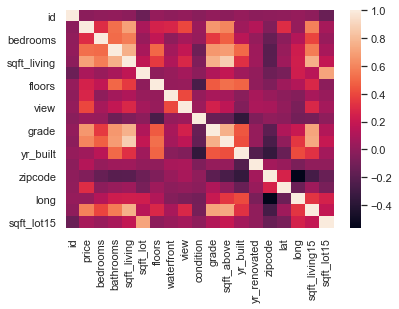

In [50]:
corr = df.corr()
sns.heatmap(corr);

In [46]:
price = df[["price", "sqft_living", 'sqft_basement',"bathrooms", "zipcode"]]
price.describe()

,price,sqft_living,bathrooms,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,2080.321850,2.115826,98077.951845
std,3.673681e+05,918.106125,0.768984,53.513072
min,7.800000e+04,370.000000,0.500000,98001.000000
25%,3.220000e+05,1430.000000,1.750000,98033.000000
50%,4.500000e+05,1910.000000,2.250000,98065.000000
75%,6.450000e+05,2550.000000,2.500000,98118.000000
max,7.700000e+06,13540.000000,8.000000,98199.000000


In [47]:
corr_price = price.corr()

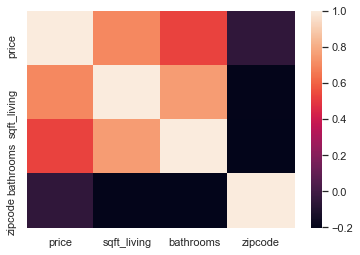

In [48]:
sns.heatmap(corr_price);

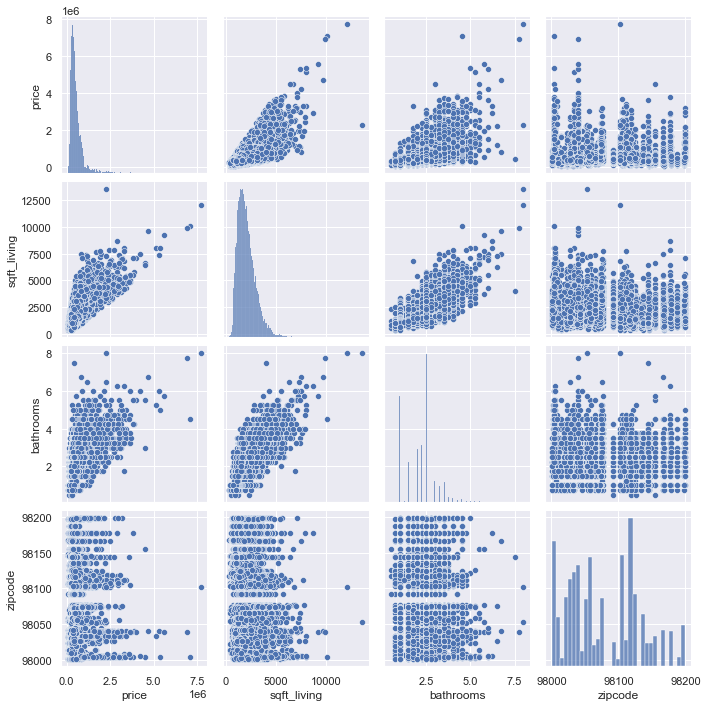

In [75]:
sns.pairplot(price)

- Based on heat map, living space and number of bathrooms are mildly correlated with price, zipcode has low correlation.

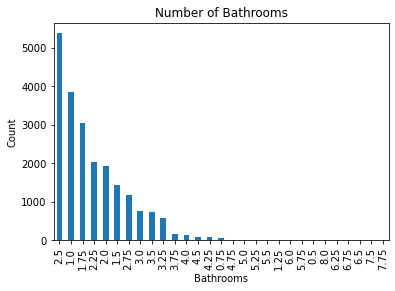

In [39]:
df['bathrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
sns.despine;

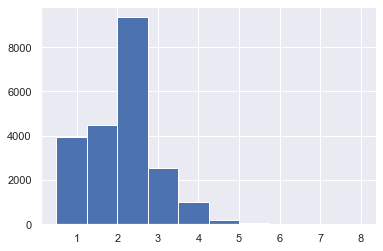

In [74]:
price['bathrooms'].hist();

- Most houses are built with 1 and 2.5 bathrooms and sell the most. 
- Kind of a normal distribution; mean is 2.11 bathrooms; outliers after 4.

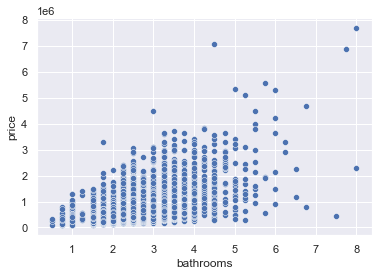

In [70]:
sns.scatterplot(data=price, x="bathrooms", y="price");

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

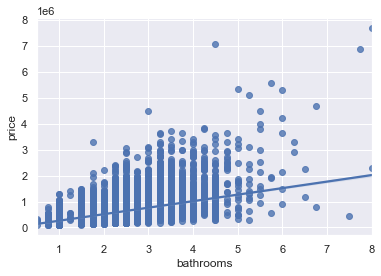

In [71]:
sns.regplot(x="bathrooms", y="price", data=price)